# Pymaceuticals Inc.
---

### Analysis

- Mean, median, variance, standard deviation, and SEM of the tumor volume was lowest across the board with the drug Ramicane. 
- Mean, median, variance, standard deviation, and SEM of the tumor volume was highest across the board with the drug Ketapril.
- Overall, mice that weighed more had tumors with higher volumes.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
# Checking the number of mice.
total_mice = mouse_data_complete["Mouse ID"].unique()
len(total_mice)

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
holder_df = mouse_data_complete[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicate_mouse = holder_df['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete[mouse_data_complete['Mouse ID'] == duplicate_mouse[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_complete[mouse_data_complete['Mouse ID'] != duplicate_mouse[0]]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [44]:
# Checking the number of mice in the clean DataFrame.
clean_total = clean_df["Mouse ID"].unique()
len(clean_total)

248

## Summary Statistics

In [45]:
#Find Mean Tumor Volume by Drug Regimens
mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [46]:
#Find Median Tumor Volume by Drug Regimens
median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [47]:
#Find Tumor Volume Variance by Drug Regimens
tumor_volume_variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [48]:
#Find Standard Deviation of Tumor Volume by Drug Regimens
tumor_volume_std_dev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [49]:
#Find Standard Error of Tumor Volume by Drug Regimens
tumor_volume_std_err = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_volume_std_err

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
col_names = [
    'Mean Tumor Volume',
    'Median Tumor Volume',
    'Tumor Volume Variance',
    'Tumor Volume Std. Dev.',
    'Tumor Volume Std. Err.'
]
drug_summary = pd.DataFrame(columns= col_names)
drug_summary

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

list_of_things = [
    mean_tumor_volume, 
    median_tumor_volume,
    tumor_volume_variance,
    tumor_volume_std_dev,
    tumor_volume_std_err
]

i=0
for name in col_names:
    drug_summary[name] = list_of_things[i]
    i+=1

drug_summary






,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [52]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Mice Tested')

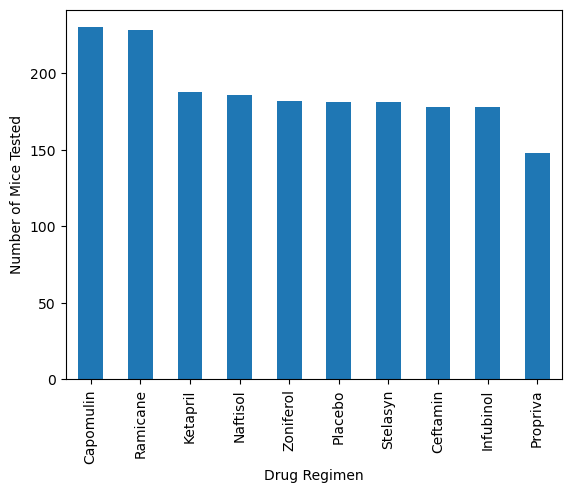

In [53]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Mice Tested")



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

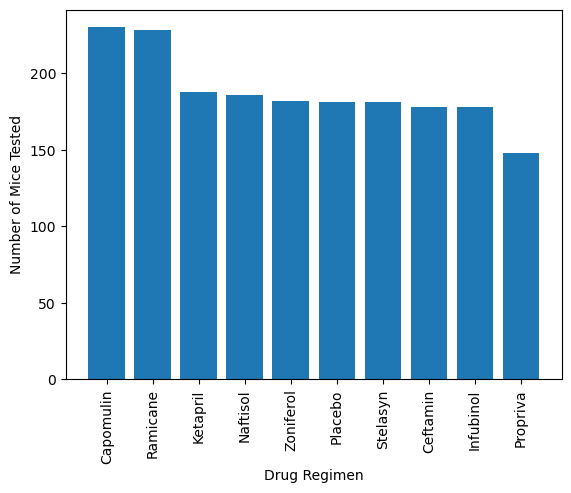

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs_pyplot = clean_df.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False)

plt.bar(drugs_pyplot.index,drugs_pyplot.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation='vertical')


In [55]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


<AxesSubplot: ylabel='Sex'>

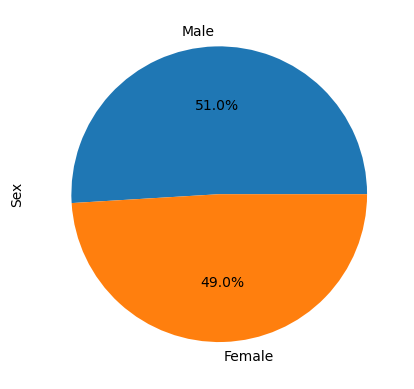

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.groupby(['Sex']).count()['Mouse ID'].sort_values(ascending=False).plot.pie(autopct='%1.1f%%', ylabel ='Sex')






Text(0, 0.5, 'Sex')

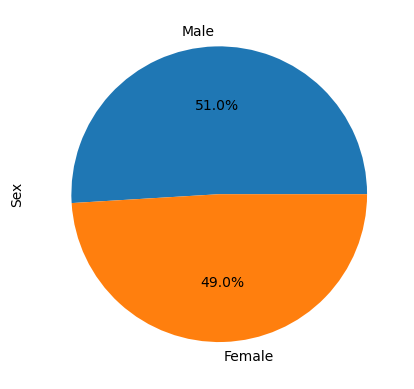

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_pyplot = clean_df.groupby(['Sex']).count()['Mouse ID'].sort_values(ascending=False)

plt.pie(sex_pyplot.values, labels = sex_pyplot.index, autopct='%1.1f%%')
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
new_df = clean_df[clean_df['Drug Regimen'].isin(drug_list) ]
new_df
# Start by getting the last (greatest) timepoint for each mouse
grouped_df = new_df.groupby(['Mouse ID']).max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_df, clean_df, how='left', left_on=["Mouse ID", "Timepoint"],right_on=["Mouse ID", "Timepoint"]) 
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [59]:
import numpy as np 

In [60]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_df['Drug Regimen'].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drugs_and_tumor = merged_df.filter(['Drug Regimen', 'Tumor Volume (mm3)']).copy()
all_mins = drugs_and_tumor.groupby('Drug Regimen').min()['Tumor Volume (mm3)']
all_q1 = drugs_and_tumor.groupby('Drug Regimen').agg(lambda x: np.percentile(x,q=25))
all_q3 = drugs_and_tumor.groupby('Drug Regimen').agg(lambda x: np.percentile(x,q=75))
all_iqr = all_q3 - all_q1
#all_iqr.reset_index(inplace=True)

#get bounds for each thing
drugs_q_info = pd.merge(all_iqr,(pd.merge(all_q1,all_q3,left_index=True, right_index=True)),left_index=True, right_index=True)
drugs_q_info.columns = ['IQR','Q1','Q3']
drugs_q_info.reset_index(inplace=True)
drugs_q_info['Upper'] = drugs_q_info['IQR'] * 1.5 + drugs_q_info['Q3']
drugs_q_info['Lower'] = drugs_q_info['Q3'] - drugs_q_info['IQR'] * 1.5

def outlier_check(some_drug,some_val):
    if some_drug == 'Capomulin':
        if (some_val > drugs_q_info[drugs_q_info['Drug Regimen'] == 'Capomulin']['Upper'][0] 
            or some_val < drugs_q_info[drugs_q_info['Drug Regimen'] == 'Capomulin']['Lower'][0]):
            return True
        else:
            return False
    elif some_drug == 'Ceftamin':
        if (some_val > drugs_q_info[drugs_q_info['Drug Regimen'] == 'Ceftamin']['Upper'][1] 
            or some_val < drugs_q_info[drugs_q_info['Drug Regimen'] == 'Ceftamin']['Lower'][1]):
            return True
        else:
            return False
    elif some_drug == 'Infubinol':
        if (some_val > drugs_q_info[drugs_q_info['Drug Regimen'] == 'Infubinol']['Upper'][2] 
            or some_val < drugs_q_info[drugs_q_info['Drug Regimen'] == 'Infubinol']['Lower'][2]):
            return True
        else:
            return False
    else:
        if (some_val > drugs_q_info[drugs_q_info['Drug Regimen'] == 'Ramicane']['Upper'][3] 
            or some_val < drugs_q_info[drugs_q_info['Drug Regimen'] == 'Ramicane']['Lower'][3]):
            return True
        else:
            return False
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
merged_df['is_outlier'] = merged_df.apply(lambda x: outlier_check(x['Drug Regimen'],x['Tumor Volume (mm3)']),axis=1)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

<AxesSubplot: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

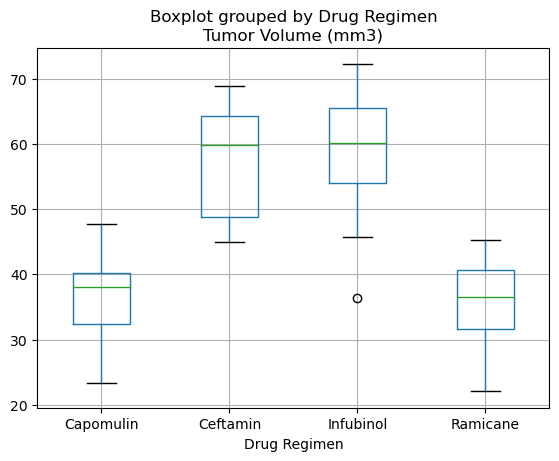

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
merged_df.boxplot(column= 'Tumor Volume (mm3)', by= 'Drug Regimen')


## Line and Scatter Plots

<AxesSubplot: title={'center': 'Capomulin Treatment of Mouse L509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

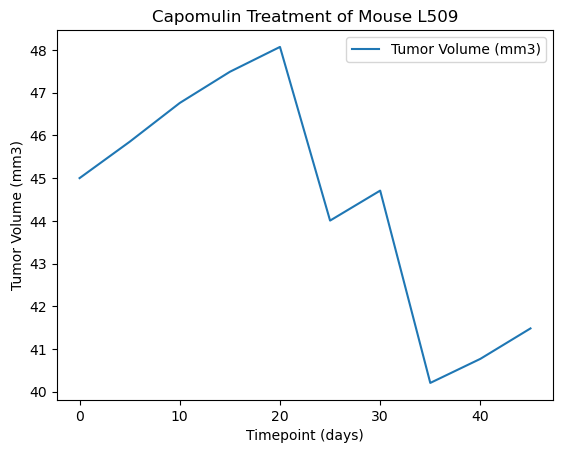

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_friend = clean_df[clean_df['Mouse ID'] == 'l509']
mouse_friend

mouse_friend.plot.line(
    x= 'Timepoint', 
    y= 'Tumor Volume (mm3)',
    ylabel="Tumor Volume (mm3)", 
    xlabel='Timepoint (days)', 
    title= 'Capomulin Treatment of Mouse L509')


c:\Users\gmass\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

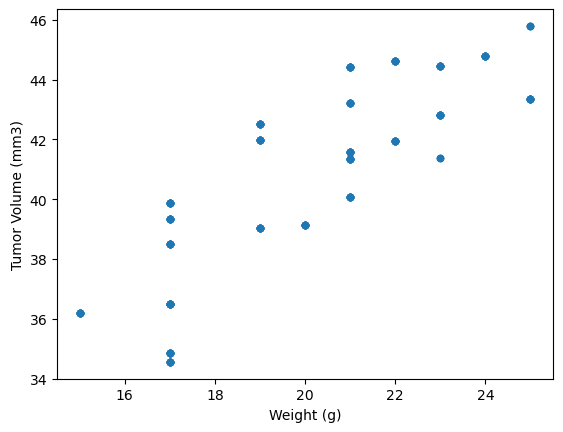

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
grouped_scatter = scatter_plot_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
merged_scatter = pd.merge(grouped_scatter,scatter_plot_df[['Mouse ID','Weight (g)']],how='left',on=['Mouse ID','Mouse ID'])
merged_scatter.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')


#

## Correlation and Regression

In [64]:
merged_scatter

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b128,41.963636,22
2,b128,41.963636,22
3,b128,41.963636,22
4,b128,41.963636,22
...,...,...,...
225,y793,38.506829,17
226,y793,38.506829,17
227,y793,38.506829,17
228,y793,38.506829,17


In [65]:
from sklearn.linear_model import LinearRegression

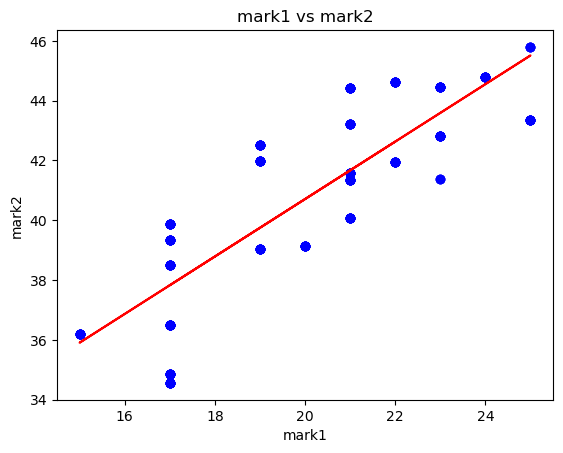

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
merged_scatter['Tumor Volume (mm3)'].corr(merged_scatter['Weight (g)'],method='pearson')
x = merged_scatter[['Weight (g)']]
y = merged_scatter[['Tumor Volume (mm3)']]
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x, y, color = 'blue')
plt.plot(x, regressor.predict(x), color = 'red')
plt.title('mark1 vs mark2')
plt.xlabel('mark1')
plt.ylabel('mark2')
plt.show()
